# Case Study on Correlation and Regression


A textile company regularly spent money on five advertising companies for their
ads.

# 1. First of all, check whether there is any relationship between the amountspent for advertising through five different companies and profit generated.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [43]:
data= pd.read_csv('Add_sales_data_2018.csv')

In [44]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [45]:
data.describe()#computes a summary of statistics pertaining to the DataFrame columns

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [46]:
data.corr(method ='pearson')

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


In [47]:
corrmatrix=data.corr()

<AxesSubplot:>

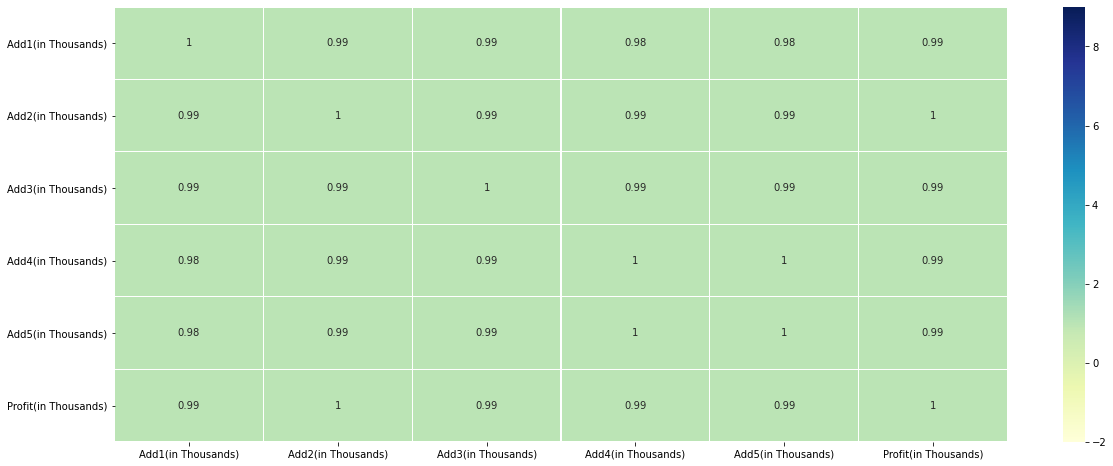

In [48]:
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-2,vmax=9,annot=True,linewidth=0.2,cmap='YlGnBu')

insights:relationship between the amountspent for advertising through five different companies done with correlation matrix

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [49]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [61]:
data1=data.drop(['Date','Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)'],axis=1)

<AxesSubplot:>

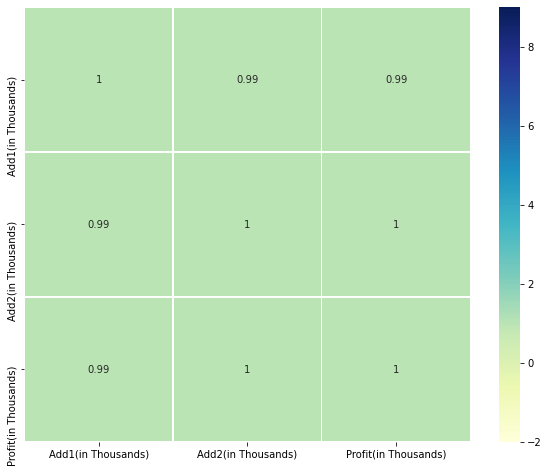

In [52]:
corrmatrix=data1.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-2,vmax=9,annot=True,linewidth=0.2,cmap='YlGnBu')

In [53]:
y=data1['Profit(in Thousands)']
x=data1.drop(['Profit(in Thousands)'],axis=1)

In [54]:
x.shape

(205, 2)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=.25)

In [56]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [57]:
model=lr.fit(x_train,y_train)

In [58]:
predictions=model.predict(x_test)

In [59]:
print(y_test)
print(predictions)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64
[4149.33498689 4444.8011159  5247.54001805 4902.37895772 4999.47168077
 4620.12796372 5392.13430676 5337.21673027 5162.939955

## to check the accurancy of the model

In [30]:
from sklearn.metrics import mean_squared_error
print('MSE is:\n',mean_squared_error(y_test,predictions))

MSE is:
 508.9897439147763


# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [38]:
data.head()

,Predicted Profit
0,4149.334987
1,4444.801116
2,5247.540018
3,4902.378958
4,4999.471681


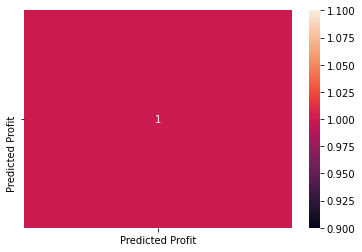

In [39]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [34]:
make_pred=[['290','312','309','298','320']]

In [40]:
data = pd.DataFrame(data={"Predicted Profit": predictions.flatten()})
print(data.head())

   Predicted Profit
0       4149.334987
1       4444.801116
2       5247.540018
3       4902.378958
4       4999.471681
